In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
cd '/content/drive/My Drive/MTA_HACK/'

/content/drive/My Drive/MTA_HACK


In [185]:
import pandas as pd
import time
from datetime import datetime


**Reading Data**

In [186]:
df = pd.DataFrame()
column_names = ["ticketId","activationTimestamp", "productName","origin", "originName","destination", "destinationName"]
for i in range(20):
  df = df.append(pd.read_csv (r'/content/drive/My Drive/MTA_HACK/Activations/Activations_1_csv/masabi_etix_mnractivations_1_part_'+str(i)+'_20200702.csv', usecols= column_names))
  print(df.shape)

(333088, 7)
(666359, 7)
(999453, 7)
(1332841, 7)
(1665872, 7)
(1999195, 7)
(2332361, 7)
(2665651, 7)
(2998880, 7)
(3332217, 7)
(3665362, 7)
(3998704, 7)
(4331726, 7)
(4665036, 7)
(4998178, 7)
(5331525, 7)
(5664672, 7)
(5998009, 7)
(6331268, 7)
(6665357, 7)


In [187]:
df.shape

(6665357, 7)

**Data Preprocessing**

In [188]:
df = df.dropna()

In [189]:
# df = df[df['activationTimestamp'].notna()]
df = df.sort_values(by=["activationTimestamp"])

In [190]:
df.head()

,ticketId,activationTimestamp,productName,origin,originName,destination,destinationName
206911,WTTDN2ZQ7Q2,1.493831e+12,Off-Peak,252.0,New Haven,1.0,Grand Central Terminal
236743,WTTCTF5ZXQ4,1.497033e+12,Off-Peak,163.0,Southeast,1.0,Grand Central Terminal
120521,WTTBUW72PQJ,1.498493e+12,Off-Peak,250.0,Milford,1.0,Grand Central Terminal
128595,WTTB57T7PQS,1.499359e+12,Off-Peak,1.0,Grand Central Terminal,244.0,Fairfield
128596,WTTB6PT7PQL,1.499359e+12,Off-Peak,1.0,Grand Central Terminal,244.0,Fairfield


In [191]:
def to_date_function(df,col_names):
  for col in col_names:
    dt_object = []
    for timestamp in df[col]:
      your_dt = datetime.fromtimestamp(int(timestamp)/1000)  # using the local timezone
      dt_object.append(your_dt.strftime("%Y-%m-%d %H:%M:%S")) 
    df[col] = dt_object
  return df

In [192]:
col_names = ["activationTimestamp"]
df = to_date_function(df, col_names)

In [197]:
df["date"] = [x.split(" ")[0] for x in df["activationTimestamp"]]

In [198]:
df.head()

,ticketId,activationTimestamp,productName,origin,originName,destination,destinationName,date
206911,WTTDN2ZQ7Q2,2017-05-03 17:10:07,Off-Peak,252.0,New Haven,1.0,Grand Central Terminal,2017-05-03
236743,WTTCTF5ZXQ4,2017-06-09 18:31:05,Off-Peak,163.0,Southeast,1.0,Grand Central Terminal,2017-06-09
120521,WTTBUW72PQJ,2017-06-26 16:09:13,Off-Peak,250.0,Milford,1.0,Grand Central Terminal,2017-06-26
128595,WTTB57T7PQS,2017-07-06 16:39:41,Off-Peak,1.0,Grand Central Terminal,244.0,Fairfield,2017-07-06
128596,WTTB6PT7PQL,2017-07-06 16:39:47,Off-Peak,1.0,Grand Central Terminal,244.0,Fairfield,2017-07-06


In [199]:
dataset_covid = df[df["date"] >= "2020-01-01"]

In [200]:
dataset_covid.head()
dataset_covid["origin"] = list(dataset_covid["origin"].values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [201]:
dataset_covid = dataset_covid[dataset_covid["origin"] == 1.0]

In [202]:
dataset_covid.head()

,ticketId,activationTimestamp,productName,origin,originName,destination,destinationName,date
7355,WTTC3JIVPVH,2020-01-01 00:00:58,Monthly,1.0,Grand Central Terminal,132.0,White Plains,2020-01-01
251490,WTTA3MY27VP,2020-01-01 00:00:58,Peak / Off Peak,1.0,Grand Central Terminal,154.0,Katonah,2020-01-01
15573,WTTBHQ26PVM,2020-01-01 00:01:30,Off-Peak,1.0,Grand Central Terminal,16.0,Yonkers,2020-01-01
27082,WTTBPMU7HVB,2020-01-01 00:01:42,Peak / Off Peak,1.0,Grand Central Terminal,250.0,Milford,2020-01-01
14693,WTTCHNK5HV5,2020-01-01 00:01:59,Off-Peak,1.0,Grand Central Terminal,218.0,Greenwich,2020-01-01


In [203]:
dataset_covid = dataset_covid.groupby(by = "date").count()["ticketId"]

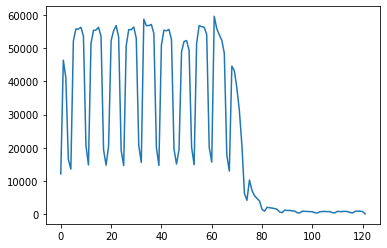

In [204]:
import matplotlib.pyplot as plt

plt.plot(dataset_covid.values)

In [205]:
df.groupby(by = ["originName"]).count().sort_values(by = "ticketId")

,ticketId,activationTimestamp,productName,origin,destination,destinationName,date
originName,,,,,,,
Breakneck Ridge,1,1,1,1,1,1,1
Appalachian Trail,7,7,7,7,7,7,7
Mount Pleasant,23,23,23,23,23,23,23
Manitou,101,101,101,101,101,101,101
Beacon-Falls,455,455,455,455,455,455,455
...,...,...,...,...,...,...,...
Fordham,133041,133041,133041,133041,133041,133041,133041
Harlem - 125th Street,147226,147226,147226,147226,147226,147226,147226
White Plains,173384,173384,173384,173384,173384,173384,173384


In [206]:
new_source = df.groupby(["date","origin","productName"]).count()["ticketId"]
new_dest = df.groupby(["date","destination","productName"]).count()["ticketId"]

In [207]:
new_dest = new_dest.reset_index()
new_dest = new_dest.rename(columns={"destination":"station","ticketId": "Number_of_passengers"})
new_source = new_source.reset_index()
new_source= new_source.rename(columns={"origin":"station","ticketId": "Number_of_passengers"})

In [208]:
new_df_pn = new_source.append(new_dest, ignore_index= True)
new_df_pn = new_df_pn.sort_values(by= ["date"], ignore_index= True)

In [209]:
new_df_pn = new_df_pn.groupby(["date","station","productName"]).sum()["Number_of_passengers"]

In [210]:
dummydf = new_df_pn.reset_index()

In [211]:
dummydf = pd.get_dummies(dummydf, columns=["productName"])

In [212]:
dummydf = pd.get_dummies(dummydf, columns=["station"])

In [213]:
# dummydf.head()
import time
year = []
month = []
day = []
for date in dummydf["date"]:
  date = time.strptime(date, "%Y-%m-%d")
  year.append(date.tm_year)
  month.append(date.tm_mon)
  day.append(date.tm_wday)
dummydf["year"] = year
dummydf["month"] = month
dummydf["day"] = day


**Data Modelling and Predictions**

In [214]:
import numpy as np
from sklearn.model_selection import train_test_split
y = dummydf["Number_of_passengers"]
# X_plot = dummydf.drop["Number_of_passengers"]
X = dummydf.drop(["Number_of_passengers"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_date = X_test["date"]
X_train, X_test = X_train.drop(["date"],axis = 1), X_test.drop(["date"], axis = 1)
score = []
MAE = []

In [215]:
X_date

3903      2019-09-22
10032     2019-12-05
133293    2020-04-21
5567      2019-10-23
76494     2020-02-15
             ...    
117381    2020-03-21
3990      2019-09-24
48892     2020-01-24
36804     2020-01-15
21706     2020-01-03
Name: date, Length: 45708, dtype: object

Linear Regression

In [216]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred = reg.predict(X_test)

In [217]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(mean_absolute_error(y_test, y_pred))
MAE.append(mean_absolute_error(y_test, y_pred))
print((r2_score(y_test, y_pred)))
score.append(r2_score(y_test, y_pred))

191.40254407051282
0.061037613115869305


In [218]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor

AdaBoostRegressor

In [219]:
reg_adb = AdaBoostRegressor().fit(X_train,y_train)
y_pred = reg_adb.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
MAE.append(mean_absolute_error(y_test, y_pred))
print((r2_score(y_test, y_pred)))
score.append(r2_score(y_test, y_pred))

136.97678696113542
0.41968907188090887


XGBoost Regression

In [220]:
reg_xgb = xgb.XGBRegressor(n_estimators=1000).fit(X_train,y_train)
y_pred = reg_xgb.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
MAE.append(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
score.append(r2_score(y_test, y_pred))

[18:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
89.74572927483848
0.6504293022290641


BaggingRegressor

In [221]:
reg_bagging = BaggingRegressor().fit(X_train,y_train)
y_pred = reg_bagging.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
MAE.append(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
score.append(r2_score(y_test, y_pred))

35.86188890801666
0.6409615006888771


ExtraTreesRegressor

In [222]:
reg_extra = ExtraTreesRegressor().fit(X_train,y_train)
y_pred = reg_extra.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
MAE.append(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
score.append(r2_score(y_test, y_pred))

35.55544045900061
0.7004795689889005


In [230]:
print(MAE, "\n", score)

[191.40254407051282, 136.97678696113542, 89.74572927483848, 35.86188890801666, 35.55544045900061] 
 [0.061037613115869305, 0.41968907188090887, 0.6504293022290641, 0.6409615006888771, 0.7004795689889005]


**Plots and Analysis**

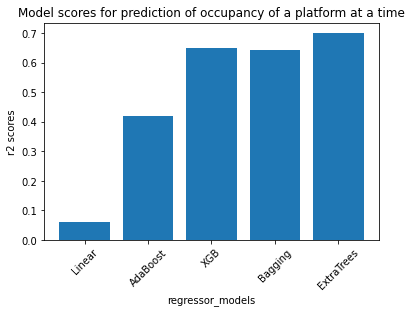

<Figure size 432x288 with 0 Axes>

In [223]:
import matplotlib.pyplot as plt
models = ["Linear", "AdaBoost","XGB", "Bagging", "ExtraTrees"]
plt.bar(models,score)
plt.xticks(rotation = 45)
plt.xlabel("regressor_models")
plt.ylabel("r2 scores")
plt.title("Model scores for prediction of occupancy of a platform at a time")
plt.show()
plt.savefig("r2_scores")

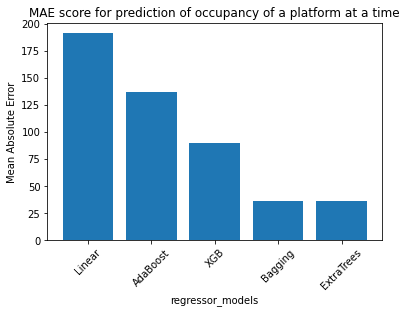

<Figure size 432x288 with 0 Axes>

In [224]:
plt.bar(models,MAE)
plt.xticks(rotation = 45)
plt.xlabel("regressor_models")
plt.ylabel("Mean Absolute Error")
plt.title("MAE score for prediction of occupancy of a platform at a time")
plt.show()
plt.savefig("MAE")